In [1]:
from tdc.multi_pred import DTI

data = DTI("KIBA", print_stats=True)

#help(data)

Found local copy...
Loading...
--- Dataset Statistics ---
2068 unique drugs.
229 unique targets.
117657 drug-target pairs.
--------------------------
Done!


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = data.get_data()

df

,Drug_ID,Drug,Target_ID,Target,Y
0,CHEMBL1087421,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,O00141,MTVKTEAAKGTLTYSRMRGMVAILIAFMKQRRMGLNDFIQKIANNS...,11.10000
1,CHEMBL1087421,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,O14920,MSWSPSLTTQTCGAWEMKERLGTGGFGNVIRWHNQETGEQIAIKQC...,11.10000
2,CHEMBL1087421,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,O15111,MERPPGLRPGAGGPWEMRERLGTGGFGNVCLYQHRELDLKIAIKSC...,11.10000
3,CHEMBL1087421,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,P00533,MRPSGTAGAALLALLAALCPASRALEEKKVCQGTSNKLTQLGTFED...,11.10000
4,CHEMBL1087421,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,P04626,MELAALCRWGLLLALLPPGAASTQVCTGTDMKLRLPASPETHLDML...,11.10000
...,...,...,...,...,...
117652,CHEMBL230654,CCCc1nc[nH]c1CNc1cc(Cl)c2ncc(C#N)c(Nc3ccc(F)c(...,Q13554,MATTVTCTRFTDEYQLYEDIGKGAFSVVRRCVKLCTGHEYAAKIIN...,10.49794
117653,CHEMBL230654,CCCc1nc[nH]c1CNc1cc(Cl)c2ncc(C#N)c(Nc3ccc(F)c(...,Q13555,MATTATCTRFTDDYQLFEELGKGAFSVVRRCVKKTSTQEYAAKIIN...,10.49794
117654,CHEMBL230654,CCCc1nc[nH]c1CNc1cc(Cl)c2ncc(C#N)c(Nc3ccc(F)c(...,Q13557,MASTTTCTRFTDEYQLFEELGKGAFSVVRRCMKIPTGQEYAAKIIN...,10.49794
117655,CHEMBL230654,CCCc1nc[nH]c1CNc1cc(Cl)c2ncc(C#N)c(Nc3ccc(F)c(...,Q16539,MSQERPTFYRQELNKTIWEVPERYQNLSPVGSGAYGSVCAAFDTKT...,10.49794


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117657 entries, 0 to 117656
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Drug_ID    117657 non-null  object 
 1   Drug       117657 non-null  object 
 2   Target_ID  117657 non-null  object 
 3   Target     117657 non-null  object 
 4   Y          117657 non-null  float64
dtypes: float64(1), object(4)
memory usage: 4.5+ MB


In [4]:
df.describe()

,Y
count,117657.000000
mean,11.720685
std,0.834272
min,0.000000
25%,11.200000
50%,11.520216
75%,11.923909
max,17.200179


1. Distribution of Affinity Values (Y):

This plot reveals the spread of binding affinities in your dataset. You can use a histogram or a KDE plot:

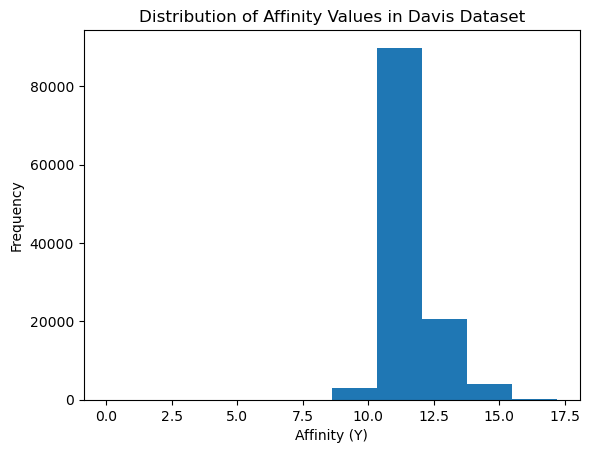

In [5]:
# Assuming 'Y' represents affinity values
plt.hist(df['Y'])
plt.xlabel('Affinity (Y)')
plt.ylabel('Frequency')
plt.title('Distribution of Affinity Values in Davis Dataset')
plt.show()

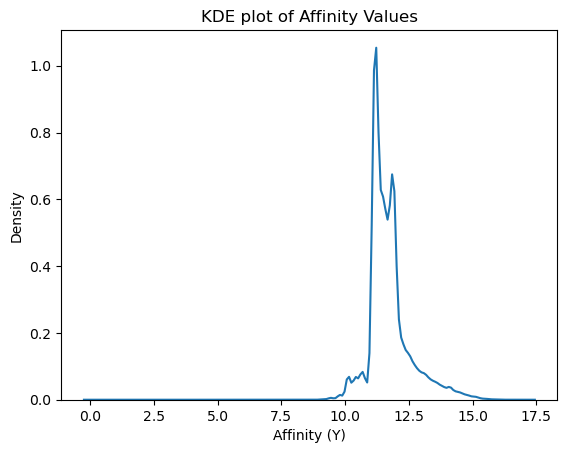

In [6]:
# For Kernel Density Estimation (KDE) plot
sns.kdeplot(df['Y'])  # Using seaborn for KDE plot
plt.xlabel('Affinity (Y)')
plt.ylabel('Density')
plt.title('KDE plot of Affinity Values')
plt.show()

2. Drug Counts per Target:

This plot explores the number of drugs interacting with each target protein. It can reveal potential biases or sparsity:

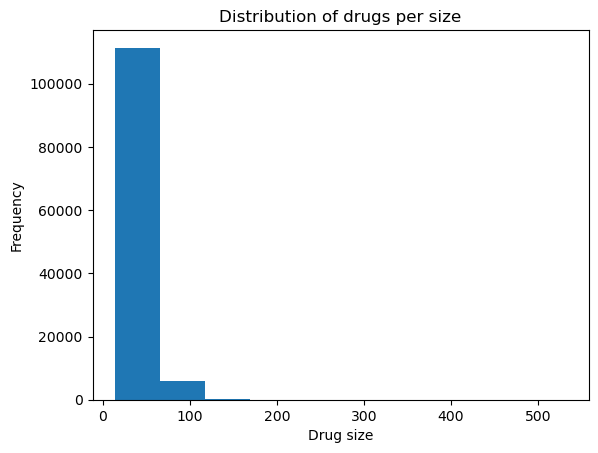

In [7]:
# Assuming 'Target_ID' is your identifier for targets
target_counts = df['Drug'].apply(len)
target_counts.plot(kind='hist', title='Distribution of drugs per size')
plt.xlabel('Drug size')
plt.ylabel('Frequency')
plt.show()

3. Scatter Plot of Affinity (Y) vs. Target Sequence Length (if available):

This plot investigates the relationship between target protein sequence length and binding affinity:

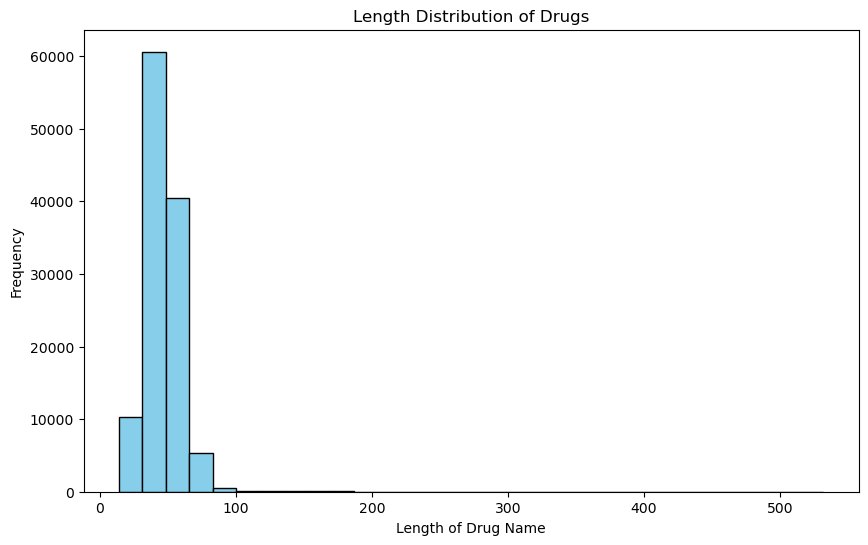

In [8]:
# Assuming 'df' is your DataFrame
df['Drug_length'] = df['Drug'].apply(len)

plt.figure(figsize=(10,6))
plt.hist(df['Drug_length'], bins=30, color='skyblue', edgecolor='black')
plt.title('Length Distribution of Drugs')
plt.xlabel('Length of Drug Name')
plt.ylabel('Frequency')
plt.show()

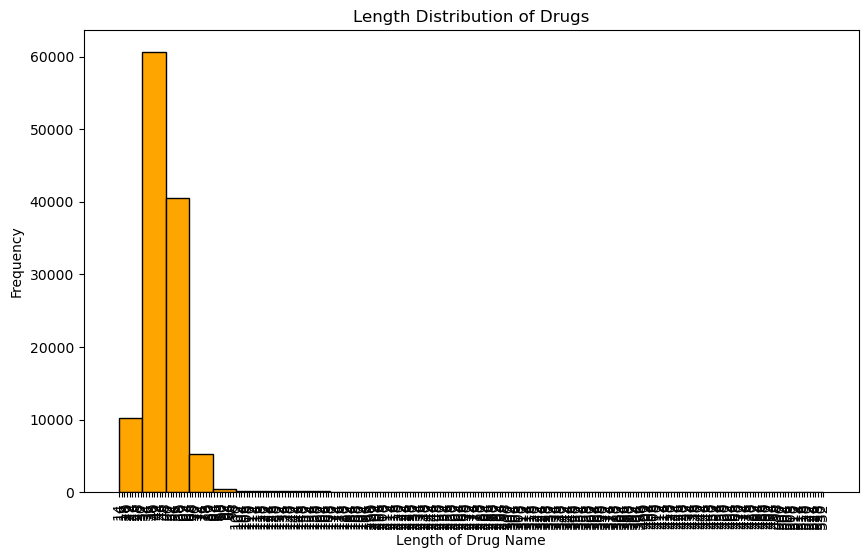

In [9]:
plt.figure(figsize=(10,6))
plt.hist(df['Drug_length'], bins=30, color='orange', edgecolor='black')  # Increase the number of bins to 100
plt.title('Length Distribution of Drugs')
plt.xlabel('Length of Drug Name')
plt.ylabel('Frequency')

# Set xticks to have more labels on x-axis
xticks = range(min(df['Drug_length']), max(df['Drug_length'])+1, 2)
plt.xticks(xticks, rotation=90)

plt.show()

In [10]:
# Assuming you have a column for 'Target_Length'
plt.scatter(df['Target_Length'], df['Y'])
plt.xlabel('Target Sequence Length')
plt.ylabel('Affinity (Y)')
plt.title('Affinity vs. Target Sequence Length')
plt.show()

KeyError: 'Target_Length'

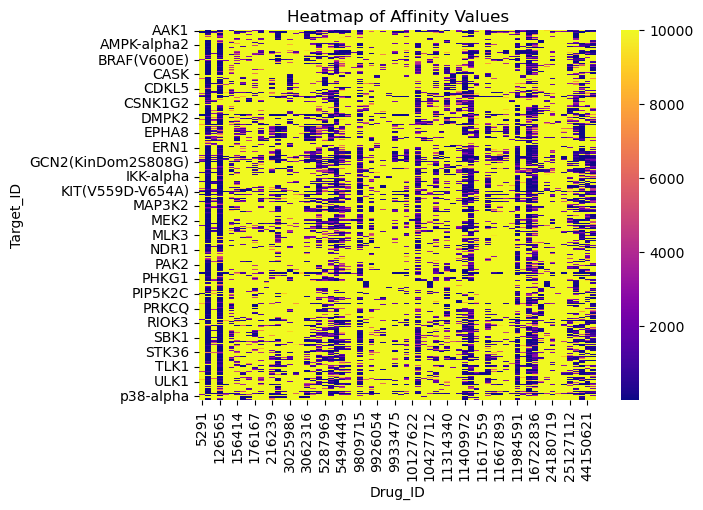

In [ ]:
# Assuming 'Drug_ID' and 'Target_ID' are for rows and columns
pivot_table = pd.pivot_table(df, values='Y', index='Target_ID', columns='Drug_ID')
sns.heatmap(pivot_table, cmap='plasma')  # Using seaborn for heatmap
plt.title('Heatmap of Affinity Values')
plt.show()